# Q9 - Background Blurring

In [94]:
import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data/a1images")
RESULTS = Path("../results/q9")
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "daisy.jpg"
img = cv.imread(str(img_path))
assert img is not None, f"Image not found at {img_path}"
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print("Loaded:", img_path, "shape:", img.shape)

Loaded: ../data/a1images/daisy.jpg shape: (841, 561, 3)


In [95]:
# Initialize mask and models for GrabCut
mask = np.zeros(img.shape[:2], dtype=np.uint8)  # mask for GrabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

In [96]:
# Define rectangle around the foreground object (x,y,w,h)
h, w = img.shape[:2]
# adjust to tightly enclose object
rect = (int(w*0.09), int(h*0.155), int(w*0.905), int(h*0.5))

# Apply GrabCut
cv.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Prepare mask for output: foreground=1, background=0
# GrabCut mask values: 0=bg,1=fg,2=prob_bg,3=prob_fg
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

In [97]:
# Extract foreground and background
foreground = img * mask2[:, :, np.newaxis]
background = cv.subtract(img, foreground)   #img * (1-mask2)[:, :, np.newaxis]

In [98]:
# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Merge for visual inspection
result = cv.add(foreground, blurred_background) #foreground + blurred_background

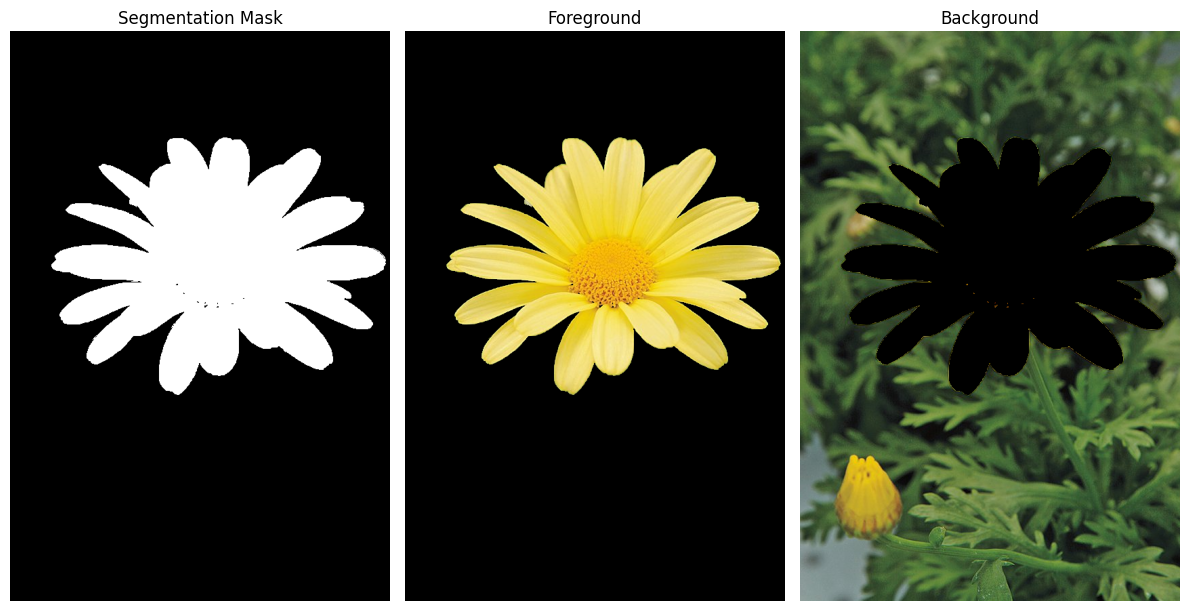

In [99]:
# Save outputs
cv.imwrite(str(RESULTS/"q9_foreground.png"), foreground)
cv.imwrite(str(RESULTS/"q9_background.png"), background)
cv.imwrite(str(RESULTS/"q9_result.png"), result)

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title("Segmentation Mask")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title("Foreground")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title("Background")
plt.axis('off')
plt.tight_layout()
plt.savefig(RESULTS/"q9_panels.png", dpi=150)
plt.show()

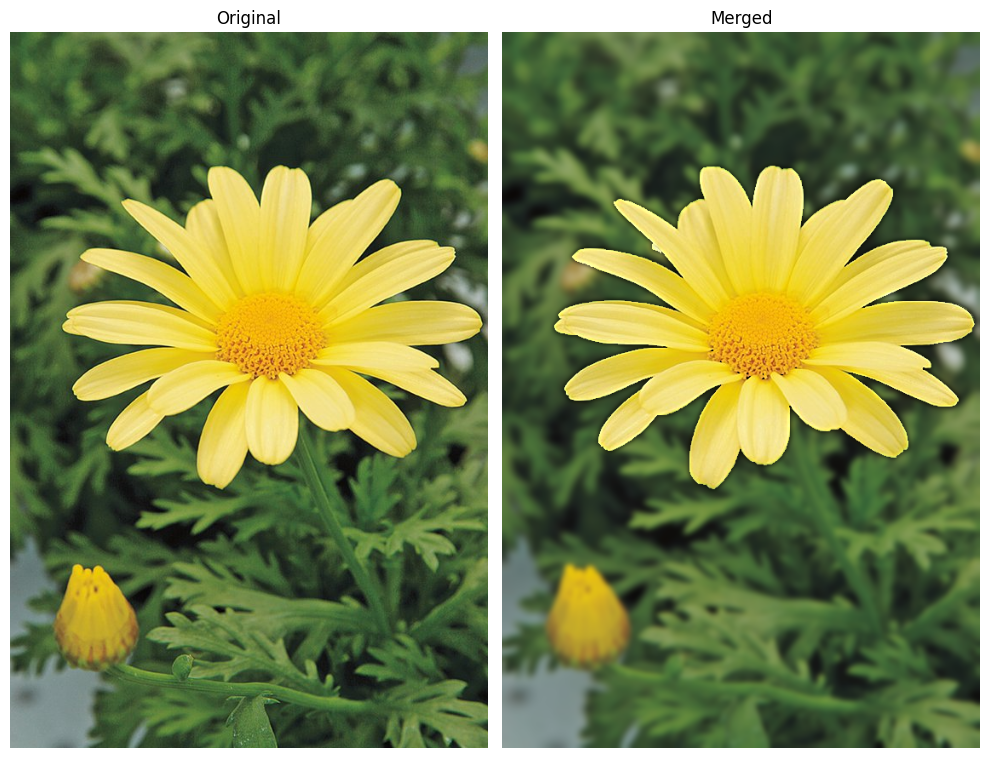

In [100]:
# Display original and background blurred images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("Merged")
plt.axis('off')
plt.tight_layout()
plt.savefig(RESULTS/"original_vs_merged.png", dpi=150)
plt.show()